<h2> LSTM Models <h2>


Create various LSTM Models and evaluating them<br>

**NOTE: Using a dataset with 10 of the best performing feature based on another student analysis**

**Features (x):**<br>
- *soil_vwc*
- *soil_ec*
- *irrigation_24h*
- *irrigation_36h*
- *irrigation_48h*
- *relative_humidity_ds_24h*
- *relative_humidity_ds_36h*
- *relative_humidity_ds_48h*
- *precipitation_36h*
- *precipitation_24h*
- *precipitation_48h*

**Target (y)** is *soil_vwc*

<br><br>


Reading the dataset file

In [16]:
df_scaled

,soil_vwc,soil_ec,irrigation_24h,irrigation_36h,irrigation_48h,relative_humidity_ds_24h,relative_humidity_ds_36h,relative_humidity_ds_48h,precipitation_36h,precipitation_24h,precipitation_48h
timestamp,,,,,,,,,,,
2023-07-11 10:10:00,-0.211271,-0.568325,-0.546472,-0.697505,-0.850408,0.635486,0.676346,0.719121,-0.319756,-0.267801,-0.362414
2023-07-11 10:20:00,-0.162457,-0.446523,-0.546472,-0.697505,-0.850408,0.612772,0.652443,0.693960,-0.319756,-0.267801,-0.362414
2023-07-11 10:30:00,-0.143942,-0.389065,-0.546472,-0.697505,-0.850408,0.578156,0.616018,0.655617,-0.319756,-0.267801,-0.362414
2023-07-11 10:40:00,-0.123743,-0.360037,-0.546472,-0.697505,-0.850408,0.537642,0.573385,0.610740,-0.319756,-0.267801,-0.362414
2023-07-11 10:50:00,-0.118693,-0.350317,-0.546472,-0.697505,-0.850408,0.505280,0.539330,0.574893,-0.319756,-0.267801,-0.362414
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 23:10:00,-0.446924,-0.722202,-0.546472,-0.697505,-0.850408,0.969098,0.898885,1.135242,-0.319756,-0.267801,-0.362414
2023-09-19 23:20:00,-0.448607,-0.722202,-0.546472,-0.697505,-0.850408,0.958112,0.885717,1.129158,-0.319756,-0.267801,-0.362414
2023-09-19 23:30:00,-0.446924,-0.722202,-0.546472,-0.697505,-0.850408,0.946782,0.873174,1.122946,-0.319756,-0.267801,-0.362414


<h3> Organizing data in time series <h3>

In [4]:
# Data Preparation for neural network
def singleStepSampler(df, window):
    xRes = []
    yRes = []
    for i in range(0, len(df) - window):
        res = []
        for j in range(0, window):
            r = df.iloc[i + j].values
            res.append(r)
        xRes.append(res)
        yRes.append(df[['soil_vwc']].iloc[i + window].values)
    return np.array(xRes), np.array(yRes)

For now using Window size = 5 and 80%-20% train-test suddivision

In [50]:
import pandas as pd
import numpy as np

# reading the ds file
df_scaled = pd.read_excel("./2023-stuard/df_best_scaled.xlsx", index_col=0)

# Costant values:
WINDOWS_SIZE = 5
SPLIT = 0.8

X_temp, y_temp = singleStepSampler(df_scaled, WINDOWS_SIZE)

# Split data into training and testing
X_train = X_temp[:int(SPLIT * len(X_temp))]
y_train = y_temp[:int(SPLIT * len(y_temp))]
X_test = X_temp[int(SPLIT * len(X_temp)):]
y_test = y_temp[int(SPLIT * len(y_temp)):]




X_train.shape, y_train.shape, X_test.shape, y_test.shape  # Check shapes


((8116, 5, 11), (8116, 1), (2030, 5, 11), (2030, 1))

In [51]:
# isolating the timestamp column to merge with the predictions in a second moment
df_copy = df_scaled
df_copy = df_copy.reset_index()
df_copy = df_copy[['timestamp']]

<h1> Building LSTM Models <h1> 

## First Model (lstmModel_1)

- 1 lstm layer (8 neurons)
- 1 Output layer
- 50 epochs

Trying using a **validation** set (33% of train set) to calculate loss and MAE every epoch.

Model: "lstmModel_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 8)                   │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649 (2.54 KB)

 Trainable params: 649 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - MAE: 0.6971 - loss: 0.6757 - val_MAE: 0.6772 - val_loss: 0.7298
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.3420 - loss: 0.2046 - val_MAE: 0.6071 - val_loss: 0.5718
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.3273 - loss: 0.1771 - val_MAE: 0.5121 - val_loss: 0.3874
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2922 - loss: 0.1392 - val_MAE: 0.4257 - val_loss: 0.2665
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2606 - loss: 0.1111 - val_MAE: 0.3595 - val_loss: 0.1943
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2314 - loss: 0.0916 - val_MAE: 0.3099 - val_loss: 0.1496
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2050 - loss: 0.0761 - val_MAE: 0.2686 - val_loss: 0.1201
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.1816 - loss: 0.0623 - val_MAE: 0.2323 - val_loss: 0.0982
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MA

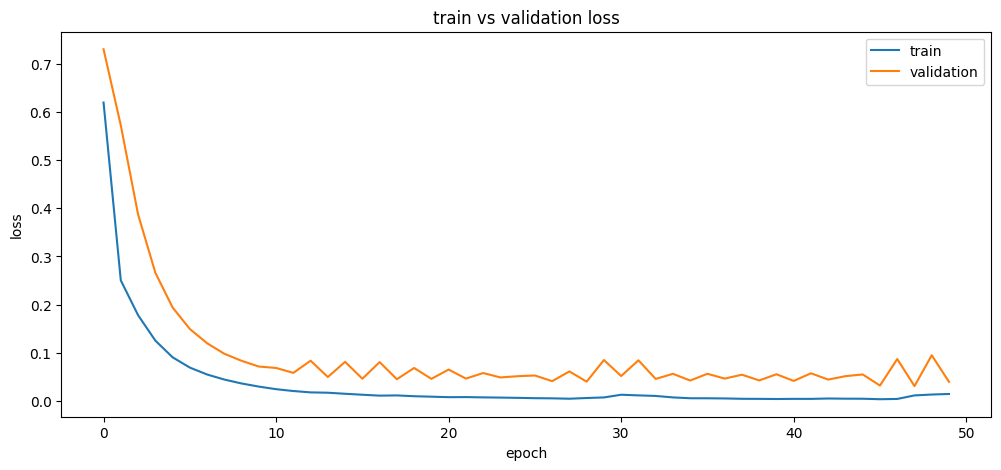

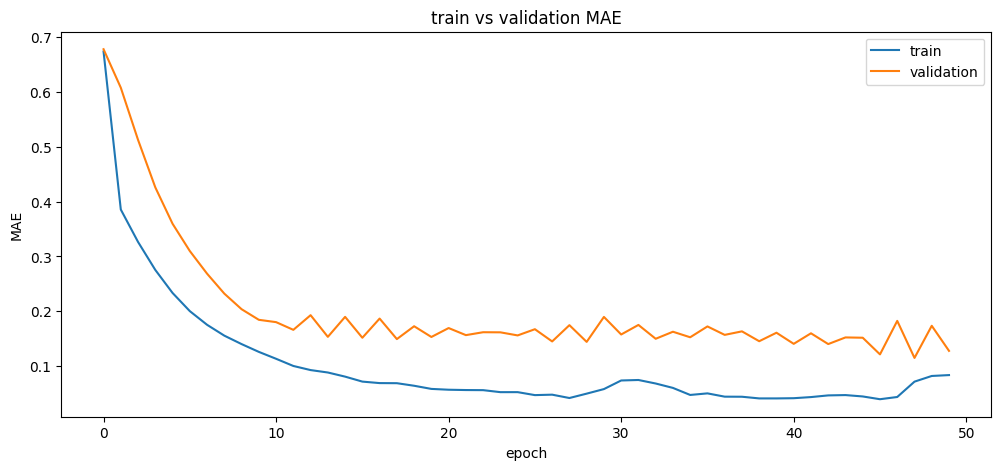

In [53]:
import numpy as np
from sklearn.metrics import mean_absolute_error
import keras
import matplotlib.pyplot as plt

# Create model structure
lstmModel_1 = keras.Sequential(name="lstmModel_1")
lstmModel_1.add(keras.layers.LSTM(8, input_shape=(X_train.shape[1], X_train.shape[2]), name="LSTM_1")) 
lstmModel_1.add(keras.layers.Dense(1, activation='linear', name="Dense_1"))  # Output layer
lstmModel_1.compile(loss='MeanSquaredError', metrics=['MAE'], optimizer=Adam(learning_rate=0.001))
lstmModel_1.summary()

# Convert data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Train model using created callback
history = lstmModel_1.fit(X_train, y_train, epochs=50, validation_split=0.33, shuffle=False)

# Loss Graph in train and validation
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# MAE Graph in train and validation
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('train vs validation MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


## Second Model (lstmModel_2)

- 2 lstm layer (64-16 neurons)
- 1 dropout layer 
- 1 Output layer
- 50 epochs
  
Trying using a **validation** set (33% of train set) to calculate loss and MAE every epoch.

Model: "lstmModel_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 5, 64)               │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_2 (LSTM)                        │ (None, 16)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,657 (96.32 KB)

 Trainable params: 24,657 (96.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - MAE: 0.5223 - loss: 0.4375 - val_MAE: 0.5493 - val_loss: 0.5608
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.3483 - loss: 0.2117 - val_MAE: 0.2893 - val_loss: 0.1760
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.2695 - loss: 0.1272 - val_MAE: 0.2115 - val_loss: 0.0885
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.2150 - loss: 0.0868 - val_MAE: 0.1482 - val_loss: 0.0595
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.1810 - loss: 0.0619 - val_MAE: 0.1666 - val_loss: 0.0640
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.1513 - loss: 0.0491 - val_MAE: 0.1688 - val_loss: 0.0574
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.1416 - loss: 0.0441 - val_MAE: 0.1807 - val_loss: 0.0589
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.1269 - loss: 0.0389 - val_MAE: 0.1825 - val_loss: 0.0652
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MA

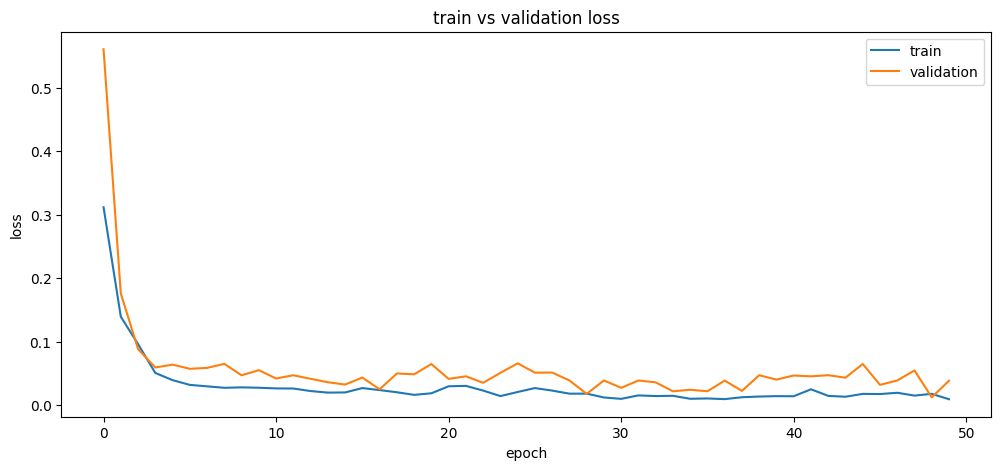

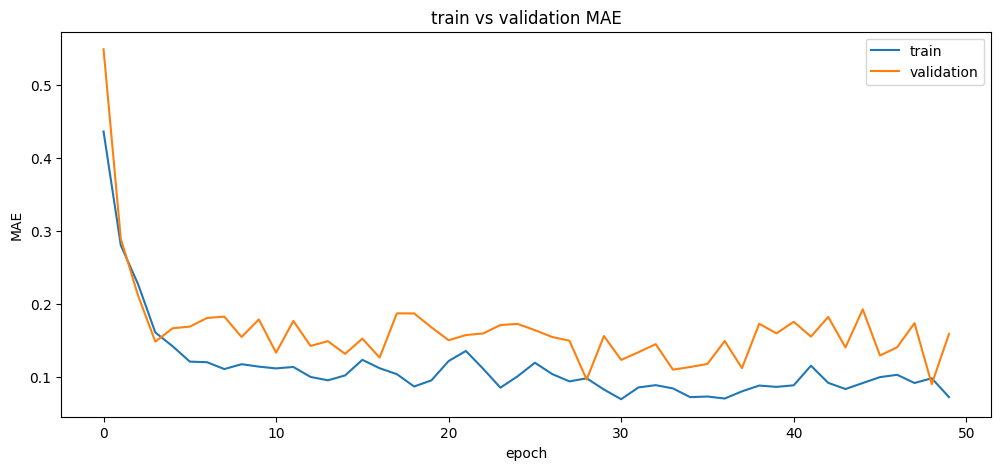

In [54]:
import numpy as np
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import keras
import matplotlib.pyplot as plt


# Create model structure
lstmModel_1 = keras.Sequential(name="lstmModel_2")
lstmModel_1.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, name="LSTM_1")) 
lstmModel_1.add(keras.layers.Dropout(0.2)) # Dropout layer to prevent overfitting
lstmModel_1.add(keras.layers.LSTM(16, name="LSTM_2")) 
lstmModel_1.add(keras.layers.Dense(1, activation='linear', name="Dense_1"))  # Output layer
lstmModel_1.compile(loss='MeanSquaredError', metrics=['MAE'], optimizer=Adam(learning_rate=0.001))
lstmModel_1.summary()

# Convert data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Train model using created callback
history = lstmModel_1.fit(X_train, y_train, epochs=50, validation_split=0.33, shuffle=False)

# Loss Graph in train and validation
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# MAE Graph in train and validation
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('train vs validation MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


## First Model (lstmModel_1) with test and SMAPE

- 1 lstm layer (8 neurons)
- 1 Output layer
- 50 epochs

Using test set to calculate smape after every epoch

Model: "lstmModel_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 8)                   │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649 (2.54 KB)

 Trainable params: 649 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
243/254 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 0.6896 - loss: 0.6730 - smape: 126.5068
Epoch 1 - Test Loss: 0.1207, Test MAE: 0.3098, Test SMAPE: 75.0136
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - MAE: 0.6846 - loss: 0.6660 - smape: 125.1756
Epoch 2/50
249/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.2864 - loss: 0.1342 - smape: 54.0846
Epoch 2 - Test Loss: 0.0745, Test MAE: 0.2651, Test SMAPE: 61.2122
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2866 - loss: 0.1347 - smape: 54.1041
Epoch 3/50
238/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.2173 - loss: 0.0789 - smape: 47.1425
Epoch 3 - Test Loss: 0.0586, Test MAE: 0.2305, Test SMAPE: 51.0250
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2169 - loss: 0.0787 - smape: 46.9679
Epoch 4/50
235/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.2016 - loss: 0.0668 - smape: 45.3399
Epoch 4 - Test Loss: 0.0445, Test MAE: 0.1971, Test SMAPE: 44.6561
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.1992 - loss: 0.0655 - smape

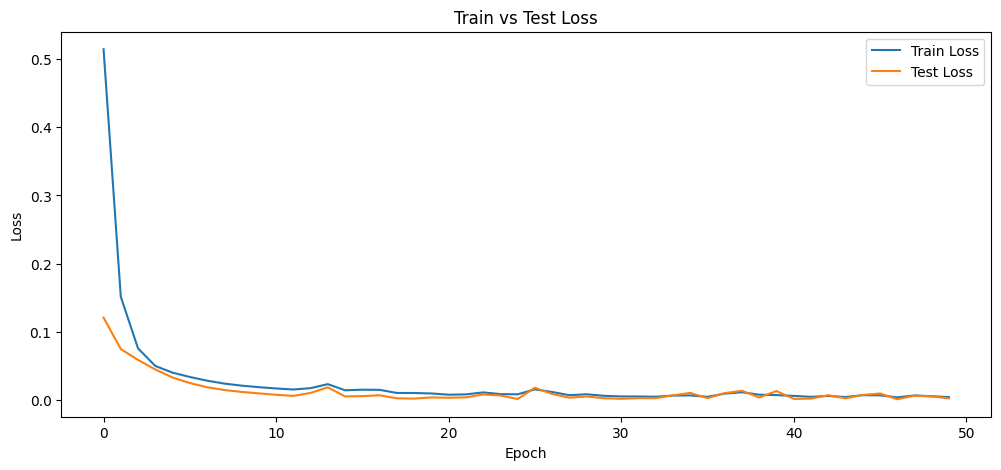

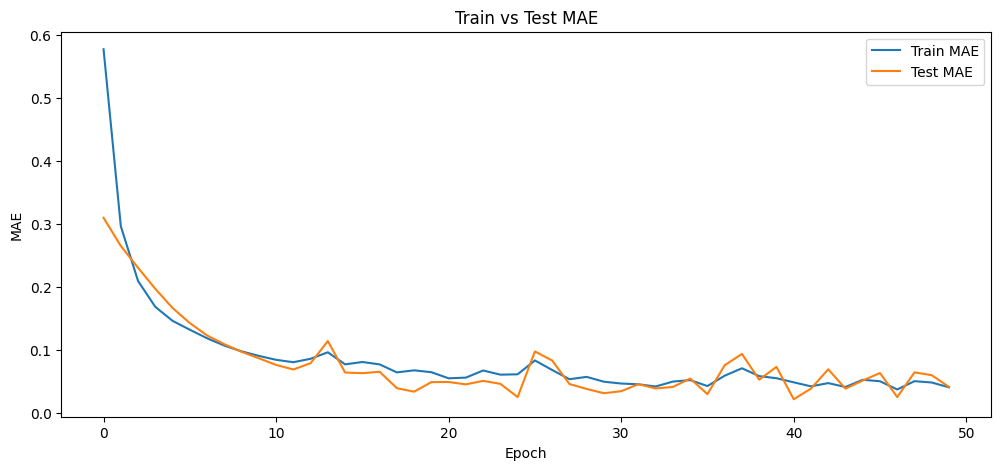

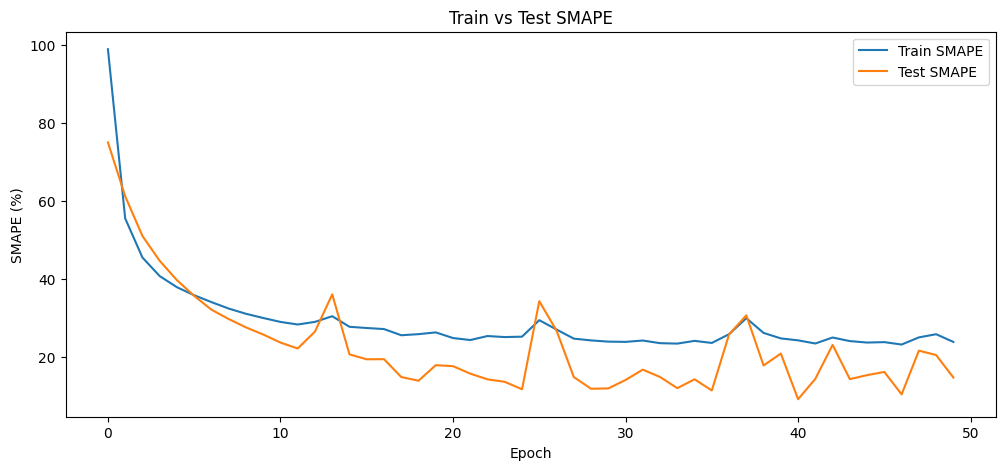

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


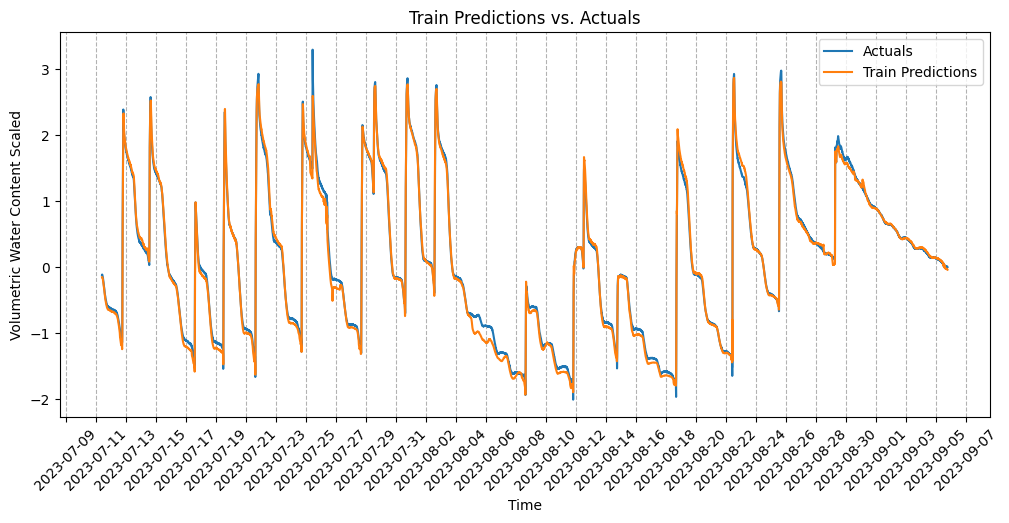

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


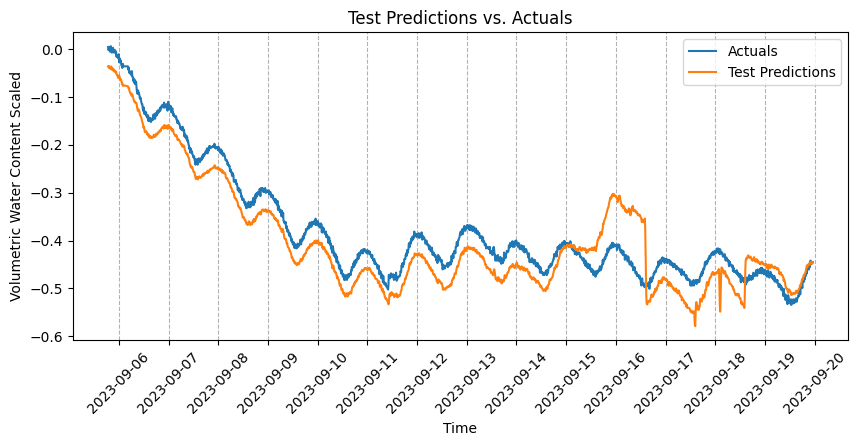

In [55]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import matplotlib.dates as mdates


# SMAPE function
def smape(y_true, y_pred):
    epsilon = keras.backend.epsilon()
    numerator = abs(y_pred - y_true)
    denominator = (abs(y_true) + abs(y_pred)) / 2.0
    return tf.reduce_mean(numerator / (denominator + epsilon)) * 100

# Callback to calculate test metrics at the end of each epoch
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_mae = []
        self.test_smape = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        loss, mae, smape_value = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_loss.append(loss)
        self.test_mae.append(mae)
        self.test_smape.append(smape_value)
        print(f"\nEpoch {epoch+1} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test SMAPE: {smape_value:.4f}")


# Create model structure
lstmModel_1 = keras.Sequential(name="lstmModel_1")
lstmModel_1.add(keras.layers.LSTM(8, input_shape=(X_train.shape[1], X_train.shape[2]), name="LSTM_1")) 
lstmModel_1.add(keras.layers.Dense(1, activation='linear', name="Dense_1"))  # Output layer
lstmModel_1.compile(loss='MeanSquaredError', metrics=['MAE', smape], optimizer=Adam(learning_rate=0.001))
lstmModel_1.summary()

# Instantiate the callback
test_metrics_callback = TestMetricsCallback(test_data=(X_test, y_test))

# Convert data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Train model without validation_split
history = lstmModel_1.fit(X_train, y_train, epochs=50, shuffle=False, callbacks=[test_metrics_callback])

# Plot Train vs Test Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'], label='Train MAE')
plt.plot(test_metrics_callback.test_mae, label='Test MAE')
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test SMAPE
plt.figure(figsize=(12, 5))
plt.plot(history.history['smape'], label='Train SMAPE')
plt.plot(test_metrics_callback.test_smape, label='Test SMAPE')
plt.title('Train vs Test SMAPE')
plt.ylabel('SMAPE (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


#TRAIN DATA VISUALIZATION

train_predictions = lstmModel_1.predict(X_train).flatten()
y_train = y_train.flatten()

# Ensure df_copy contains the 'timestamp' column
timestamp_training = df_copy['timestamp'].iloc[:int(SPLIT * len(X_temp))]
train_results = pd.DataFrame(data={'timestamp':timestamp_training, 'Train Predictions':train_predictions, 'Actuals':y_train})

# Plot the test results
plt.figure(figsize=(12, 5))
plt.plot(train_results['timestamp'], train_results['Actuals'], label='Actuals')
plt.plot(train_results['timestamp'], train_results['Train Predictions'], label='Train Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval= 2))  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.title('Train Predictions vs. Actuals')
plt.legend(['Actuals', 'Train Predictions'])
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


# TEST DATA VISUALIZATION

# Evaluate the model on the test set
test_predicions = lstmModel_1.predict(X_test).flatten()
y_test = y_test.flatten()

timestamp_testing = df_copy['timestamp'].iloc[int(SPLIT * len(X_temp)):].reset_index(drop=True)
timestamp_testing = timestamp_testing[:-5] # Drop last 5 values to match the length of test_predictions

test_results = pd.DataFrame(data={'timestamp':timestamp_testing, 'Test Predictions':test_predicions, 'Actuals':y_test})

# Plot the test results
plt.figure(figsize=(10, 4))
plt.plot(test_results['timestamp'], test_results['Actuals'], label='Actuals')
plt.plot(test_results['timestamp'], test_results['Test Predictions'], label='Test Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.legend(['Actuals', 'Test Predictions'])
plt.title('Test Predictions vs. Actuals')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


## Second Model (lstmModel_2) with test and SMAPE

- 2 lstm layer (64-16 neurons)
- 1 dropout layer 
- 1 Output layer
- 50 epochs
  
Using test set to calculate smape after every epoch

Model: "lstmModel_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 5, 64)               │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_2 (LSTM)                        │ (None, 16)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,657 (96.32 KB)

 Trainable params: 24,657 (96.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.4272 - loss: 0.3099 - smape: 79.4763
Epoch 1 - Test Loss: 0.0448, Test MAE: 0.1448, Test SMAPE: 52.9742
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - MAE: 0.4270 - loss: 0.3095 - smape: 79.4279
Epoch 2/50
243/254 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.2084 - loss: 0.0815 - smape: 42.5077
Epoch 2 - Test Loss: 0.0547, Test MAE: 0.2200, Test SMAPE: 48.8336
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.2076 - loss: 0.0810 - smape: 42.4296
Epoch 3/50
252/254 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.2072 - loss: 0.0743 - smape: 48.9595
Epoch 3 - Test Loss: 0.0391, Test MAE: 0.1781, Test SMAPE: 38.2121
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.2068 - loss: 0.0741 - smape: 48.8712
Epoch 4/50
245/254 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.1923 - loss: 0.0658 - smape: 45.0312
Epoch 4 - Test Loss: 0.0679, Test MAE: 0.2133, Test SMAPE: 42.3597
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - MAE: 0.1910 - loss: 0.0651 - smape: 

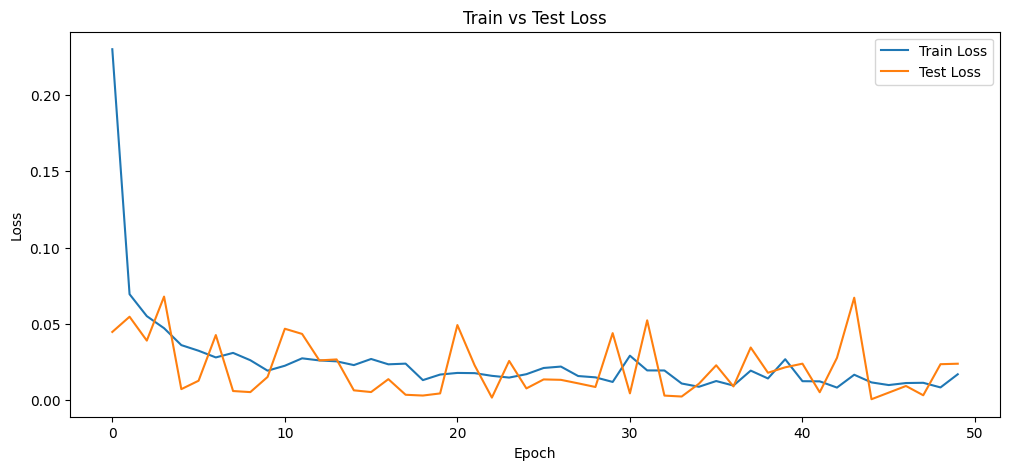

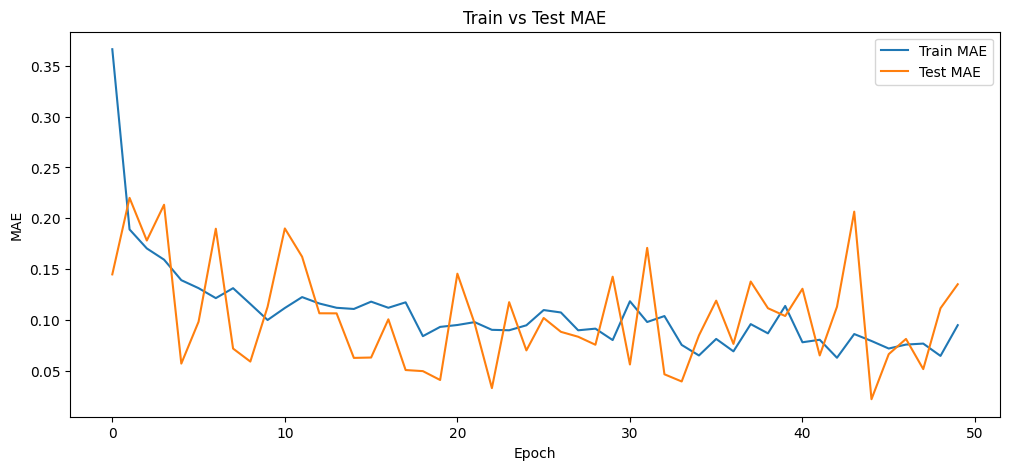

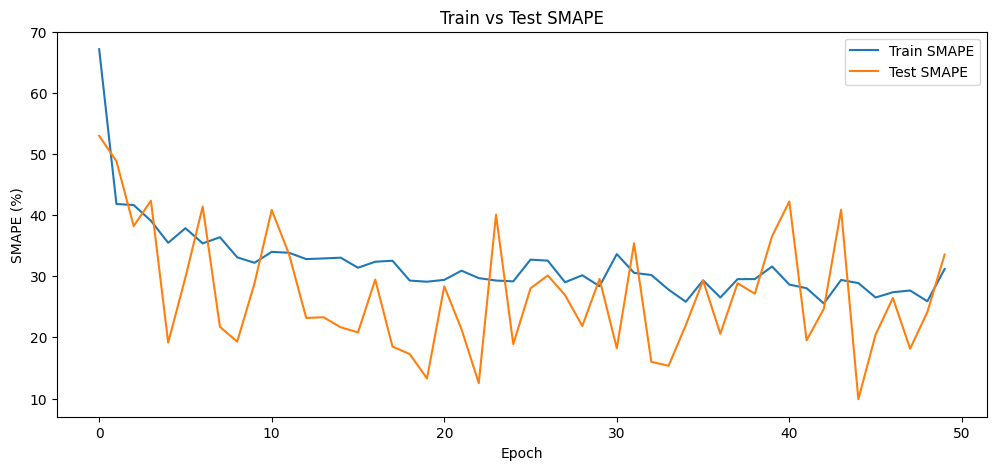

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


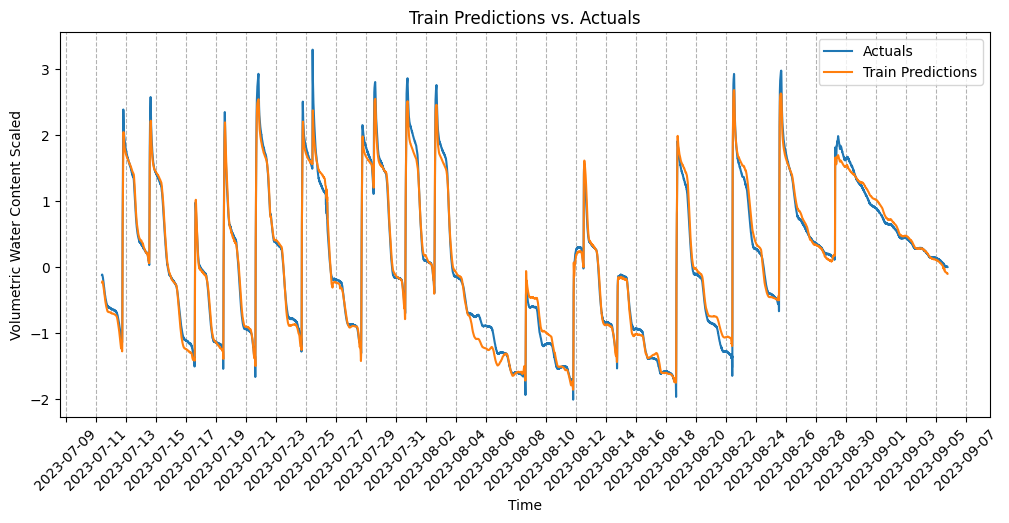

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


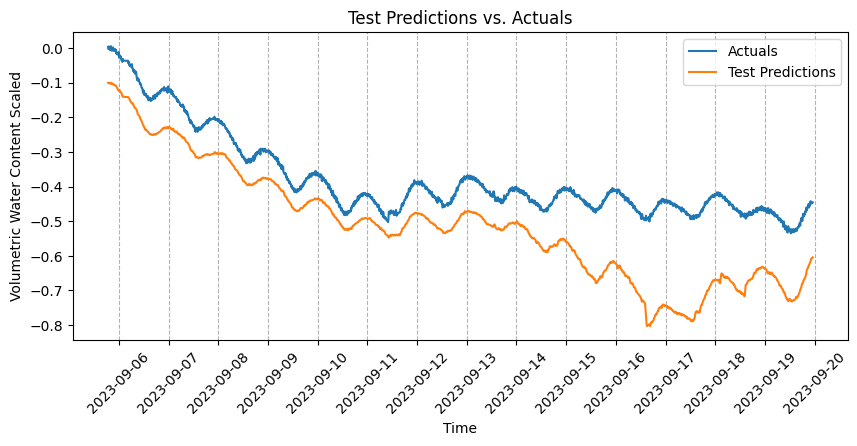

In [56]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# SMAPE function
def smape(y_true, y_pred):
    epsilon = keras.backend.epsilon()
    numerator = abs(y_pred - y_true)
    denominator = (abs(y_true) + abs(y_pred)) / 2.0
    return tf.reduce_mean(numerator / (denominator + epsilon)) * 100

# Callback to calculate test metrics at the end of each epoch
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_mae = []
        self.test_smape = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        loss, mae, smape_value = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_loss.append(loss)
        self.test_mae.append(mae)
        self.test_smape.append(smape_value)
        print(f"\nEpoch {epoch+1} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test SMAPE: {smape_value:.4f}")



# Create model structure
lstmModel_2 = keras.Sequential(name="lstmModel_2")
lstmModel_2.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, name="LSTM_1")) 
lstmModel_2.add(keras.layers.Dropout(0.3))  # Dropout layer to prevent overfitting
lstmModel_2.add(keras.layers.LSTM(16, name="LSTM_2")) 
lstmModel_2.add(keras.layers.Dense(1, activation='linear', name="Dense_1"))  # Output layer
lstmModel_2.compile(loss='MeanSquaredError', metrics=['MAE', smape], optimizer=Adam(learning_rate=0.001))
lstmModel_2.summary()

# Instantiate the callback
test_metrics_callback = TestMetricsCallback(test_data=(X_test, y_test))

# Convert data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Train model without validation_split
history = lstmModel_2.fit(X_train, y_train, epochs=50, shuffle=False, callbacks=[test_metrics_callback])

# Plot Train vs Test Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'], label='Train MAE')
plt.plot(test_metrics_callback.test_mae, label='Test MAE')
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test SMAPE
plt.figure(figsize=(12, 5))
plt.plot(history.history['smape'], label='Train SMAPE')
plt.plot(test_metrics_callback.test_smape, label='Test SMAPE')
plt.title('Train vs Test SMAPE')
plt.ylabel('SMAPE (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


#TRAIN DATA VISUALIZATION

train_predictions = lstmModel_2.predict(X_train).flatten()
y_train = y_train.flatten()

# Ensure df_copy contains the 'timestamp' column
timestamp_training = df_copy['timestamp'].iloc[:int(SPLIT * len(X_temp))]
train_results = pd.DataFrame(data={'timestamp':timestamp_training, 'Train Predictions':train_predictions, 'Actuals':y_train})

# Plot the test results
plt.figure(figsize=(12, 5))
plt.plot(train_results['timestamp'], train_results['Actuals'], label='Actuals')
plt.plot(train_results['timestamp'], train_results['Train Predictions'], label='Train Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval= 2))  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.title('Train Predictions vs. Actuals')
plt.legend(['Actuals', 'Train Predictions'])
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


# TEST DATA VISUALIZATION

# Evaluate the model on the test set
test_predicions = lstmModel_2.predict(X_test).flatten()
y_test = y_test.flatten()

timestamp_testing = df_copy['timestamp'].iloc[int(SPLIT * len(X_temp)):].reset_index(drop=True)
timestamp_testing = timestamp_testing[:-5] # Drop last 5 values to match the length of test_predictions

test_results = pd.DataFrame(data={'timestamp':timestamp_testing, 'Test Predictions':test_predicions, 'Actuals':y_test})

# Plot the test results
plt.figure(figsize=(10, 4))
plt.plot(test_results['timestamp'], test_results['Actuals'], label='Actuals')
plt.plot(test_results['timestamp'], test_results['Test Predictions'], label='Test Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.legend(['Actuals', 'Test Predictions'])
plt.title('Test Predictions vs. Actuals')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()

## lstmModel_1 with EarlyStopping  and ReduceOnPlateau

Model: "lstmModel_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 8)                   │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649 (2.54 KB)

 Trainable params: 649 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
240/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.6674 - loss: 0.6589 - smape: 115.2952
Epoch 1 - Test Loss: 0.1755, Test MAE: 0.3841, Test SMAPE: 78.9482
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - MAE: 0.6639 - loss: 0.6541 - smape: 114.4795 - learning_rate: 0.0010
Epoch 2/60
245/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.4002 - loss: 0.2723 - smape: 71.9045
Epoch 2 - Test Loss: 0.1948, Test MAE: 0.4206, Test SMAPE: 77.1823
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.4007 - loss: 0.2732 - smape: 71.8824 - learning_rate: 0.0010
Epoch 3/60
250/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.3704 - loss: 0.2315 - smape: 68.2406
Epoch 3 - Test Loss: 0.1869, Test MAE: 0.4031, Test SMAPE: 72.8867
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.3700 - loss: 0.2312 - smape: 68.1727 - learning_rate: 0.0010
Epoch 4/60
239/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.3317 - loss: 0.1920 - smape: 62.4741
Epoch 4 - Test Loss: 0.1390, Test MAE: 0.3440, Test SMAPE: 65.6764
254/2

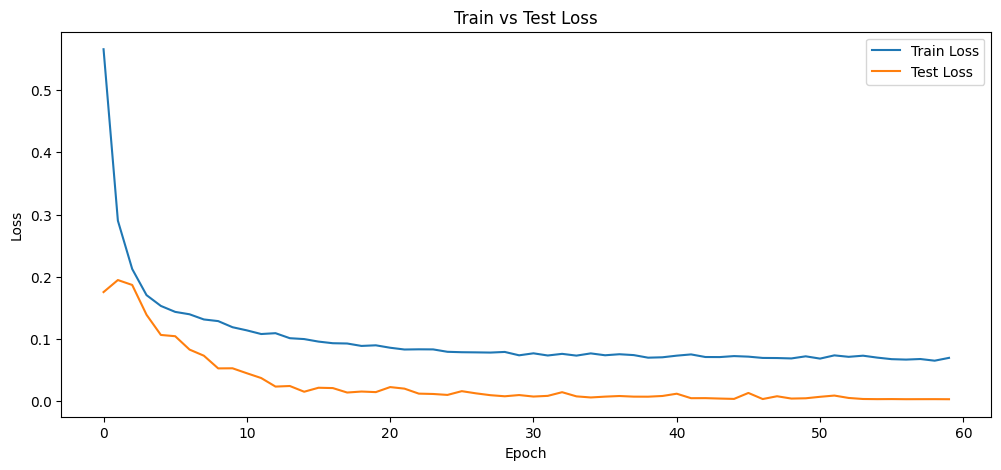

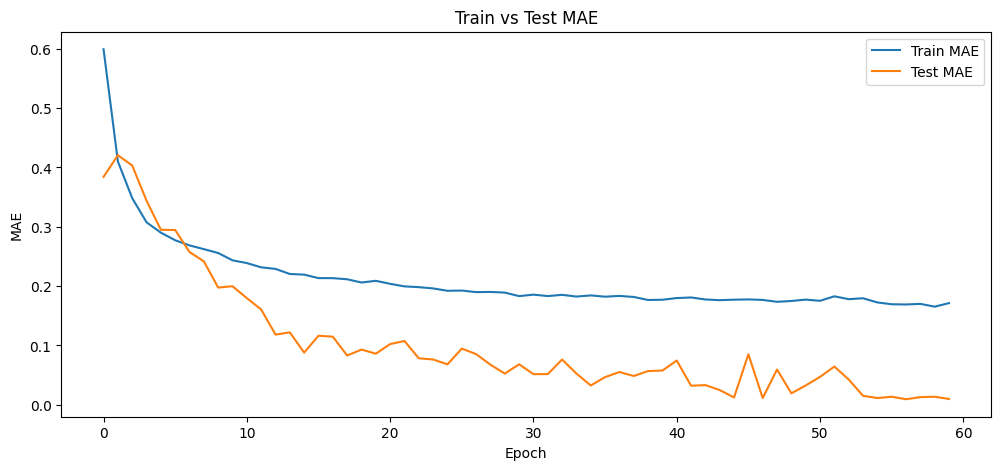

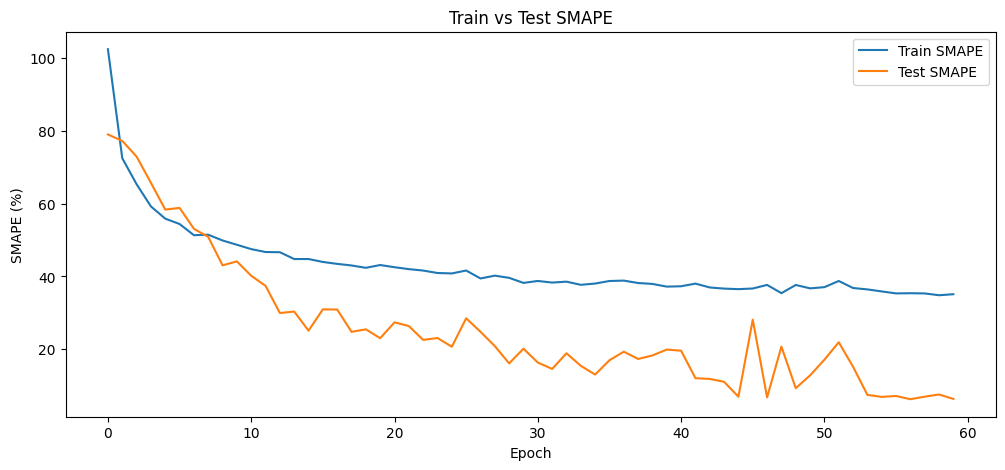

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


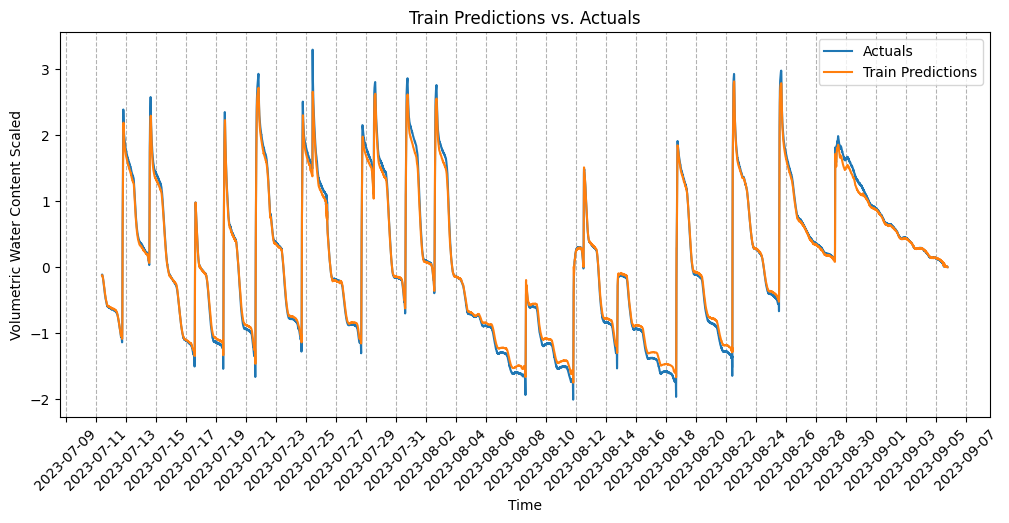

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


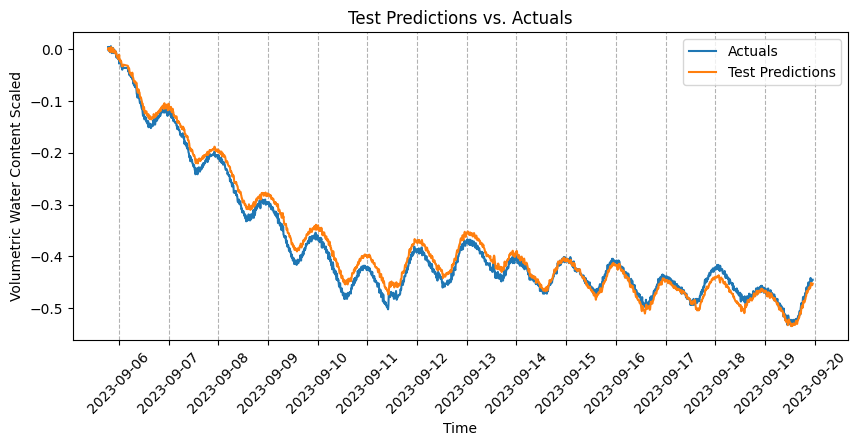

In [93]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import matplotlib.dates as mdates
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# SMAPE function
def smape(y_true, y_pred):
    epsilon = keras.backend.epsilon()
    numerator = abs(y_pred - y_true)
    denominator = (abs(y_true) + abs(y_pred)) / 2.0
    return tf.reduce_mean(numerator / (denominator + epsilon)) * 100

# Callback to calculate test metrics at the end of each epoch
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_mae = []
        self.test_smape = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        loss, mae, smape_value = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_loss.append(loss)
        self.test_mae.append(mae)
        self.test_smape.append(smape_value)
        print(f"\nEpoch {epoch+1} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test SMAPE: {smape_value:.4f}")


# Create model structure
lstmModel_1 = keras.Sequential(name="lstmModel_1")
lstmModel_1.add(keras.layers.LSTM(8, input_shape=(X_train.shape[1], X_train.shape[2]),kernel_regularizer=l2(0.0005), name="LSTM_1")) 
lstmModel_1.add(keras.layers.Dropout(0.3))  # Dropout layer to prevent overfitting
lstmModel_1.add(keras.layers.Dense(1, activation='linear',kernel_regularizer=l2(0.0005), name="Dense_1"))  # Output layer
lstmModel_1.compile(loss='MeanSquaredError', metrics=['MAE', smape], optimizer=Adam(learning_rate=0.001))
lstmModel_1.summary()

# Instantiate the callback
test_metrics_callback = TestMetricsCallback(test_data=(X_test, y_test))

# Earlu Stopping Callback
early_stopping = EarlyStopping(monitor='MAE', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='MAE', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Convert data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Train model without validation_split
history = lstmModel_1.fit(X_train, y_train, epochs=60, shuffle=False, callbacks=[early_stopping,reduce_lr, test_metrics_callback])

# Plot Train vs Test Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'], label='Train MAE')
plt.plot(test_metrics_callback.test_mae, label='Test MAE')
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test SMAPE
plt.figure(figsize=(12, 5))
plt.plot(history.history['smape'], label='Train SMAPE')
plt.plot(test_metrics_callback.test_smape, label='Test SMAPE')
plt.title('Train vs Test SMAPE')
plt.ylabel('SMAPE (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


#TRAIN DATA VISUALIZATION

train_predictions = lstmModel_1.predict(X_train).flatten()
y_train = y_train.flatten()

# Ensure df_copy contains the 'timestamp' column
timestamp_training = df_copy['timestamp'].iloc[:int(SPLIT * len(X_temp))]
train_results = pd.DataFrame(data={'timestamp':timestamp_training, 'Train Predictions':train_predictions, 'Actuals':y_train})

# Plot the test results
plt.figure(figsize=(12, 5))
plt.plot(train_results['timestamp'], train_results['Actuals'], label='Actuals')
plt.plot(train_results['timestamp'], train_results['Train Predictions'], label='Train Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval= 2))  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.title('Train Predictions vs. Actuals')
plt.legend(['Actuals', 'Train Predictions'])
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


# TEST DATA VISUALIZATION

# Evaluate the model on the test set
test_predicions = lstmModel_1.predict(X_test).flatten()
y_test = y_test.flatten()

timestamp_testing = df_copy['timestamp'].iloc[int(SPLIT * len(X_temp)):].reset_index(drop=True)
timestamp_testing = timestamp_testing[:-5] # Drop last 5 values to match the length of test_predictions

test_results = pd.DataFrame(data={'timestamp':timestamp_testing, 'Test Predictions':test_predicions, 'Actuals':y_test})

# Plot the test results
plt.figure(figsize=(10, 4))
plt.plot(test_results['timestamp'], test_results['Actuals'], label='Actuals')
plt.plot(test_results['timestamp'], test_results['Test Predictions'], label='Test Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.legend(['Actuals', 'Test Predictions'])
plt.title('Test Predictions vs. Actuals')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


## lstmModel_2 with EarlyStopping and ReduceOnPlateau

Model: "lstmModel_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 5, 64)               │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,905 (124.63 KB)

 Trainable params: 31,905 (124.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
249/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.3930 - loss: 0.3483 - smape: 75.1953
Epoch 1 - Test Loss: 0.2738, Test MAE: 0.3481, Test SMAPE: 101.8399
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - MAE: 0.3914 - loss: 0.3464 - smape: 74.8329 - learning_rate: 0.0010
Epoch 2/60
250/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.2888 - loss: 0.2171 - smape: 52.0799
Epoch 2 - Test Loss: 0.0706, Test MAE: 0.1115, Test SMAPE: 32.6119
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.2887 - loss: 0.2168 - smape: 52.1106 - learning_rate: 0.0010
Epoch 3/60
250/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.2274 - loss: 0.1470 - smape: 46.8479
Epoch 3 - Test Loss: 0.0833, Test MAE: 0.1770, Test SMAPE: 45.0479
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.2273 - loss: 0.1468 - smape: 46.7954 - learning_rate: 0.0010
Epoch 4/60
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.2022 - loss: 0.1182 - smape: 42.8058
Epoch 4 - Test Loss: 0.0580, Test MAE: 0.1340, Test SMAPE: 34.6001
254/25

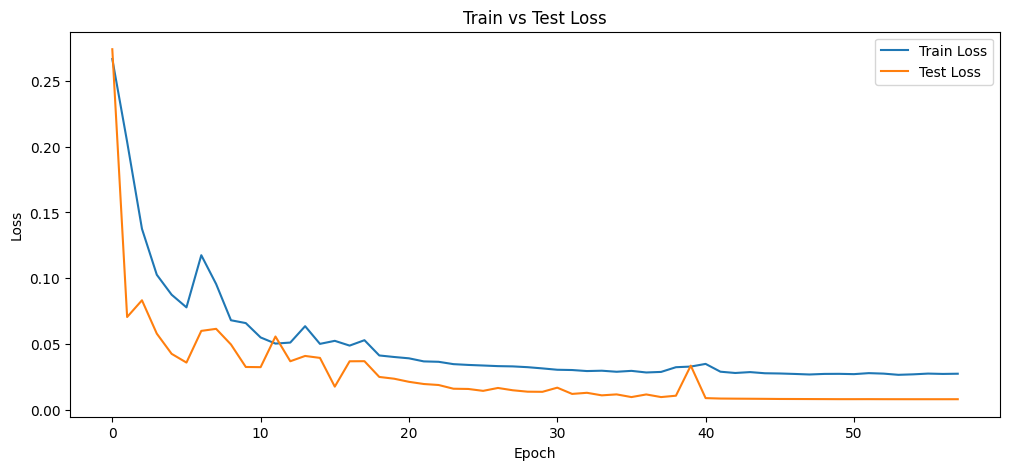

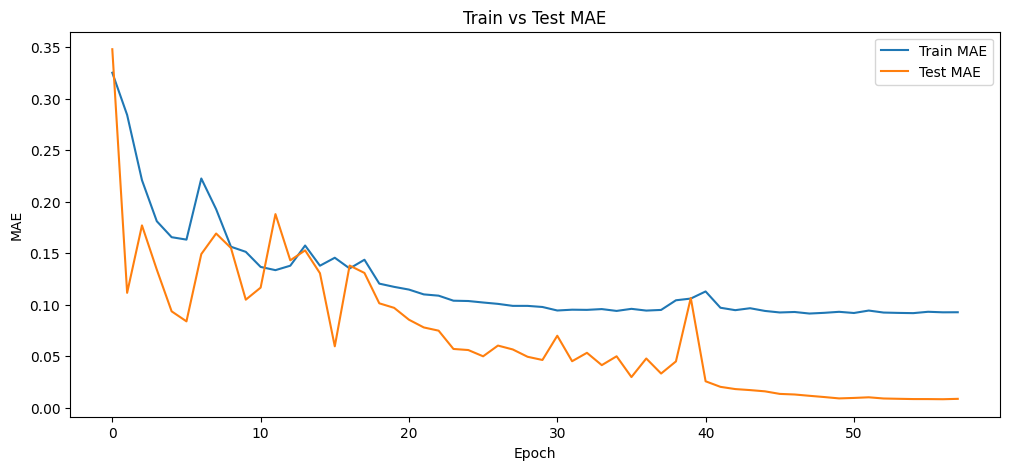

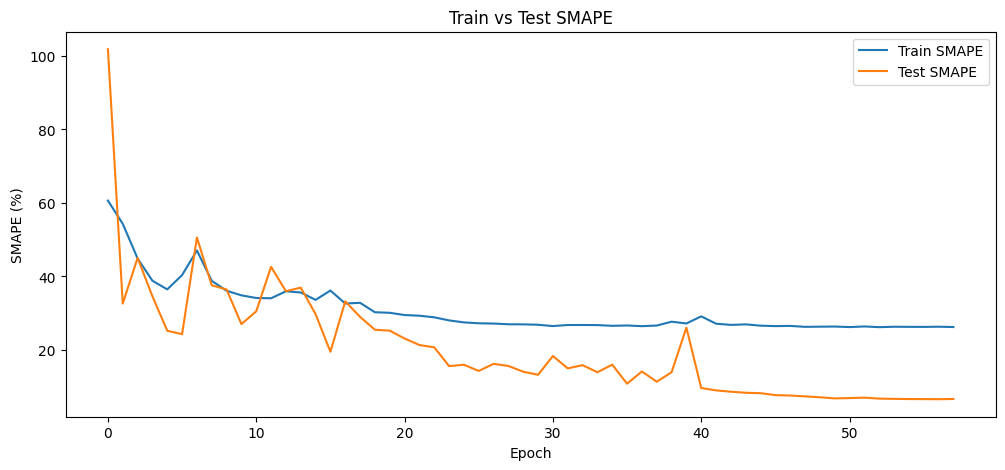

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


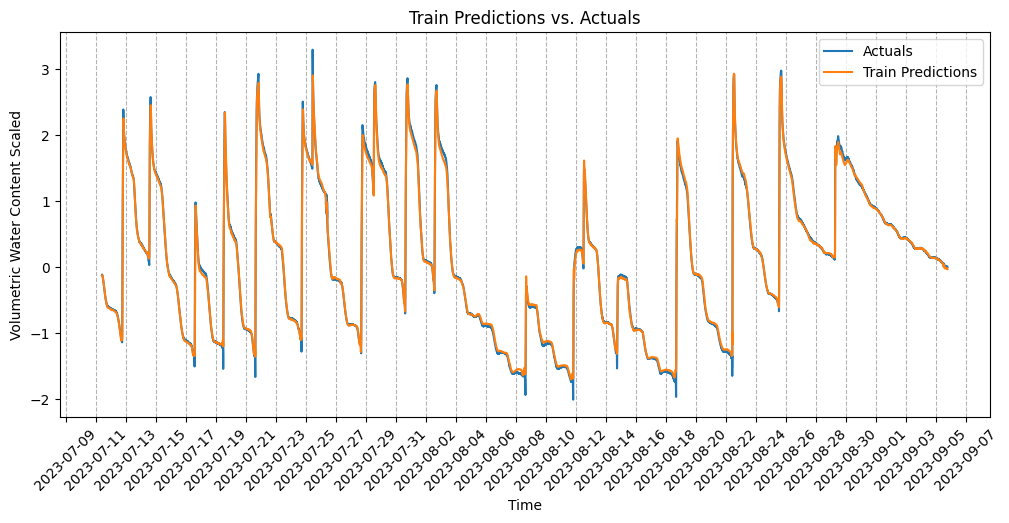

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


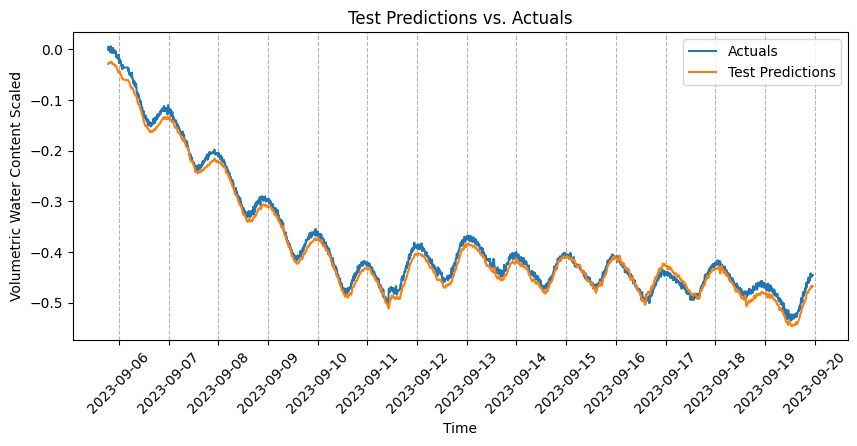

In [87]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# SMAPE function
def smape(y_true, y_pred):
    epsilon = keras.backend.epsilon()
    numerator = abs(y_pred - y_true)
    denominator = (abs(y_true) + abs(y_pred)) / 2.0
    return tf.reduce_mean(numerator / (denominator + epsilon)) * 100

# Callback to calculate test metrics at the end of each epoch
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_mae = []
        self.test_smape = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        loss, mae, smape_value = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_loss.append(loss)
        self.test_mae.append(mae)
        self.test_smape.append(smape_value)
        print(f"\nEpoch {epoch+1} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test SMAPE: {smape_value:.4f}")



# Create model structure
lstmModel_2 = keras.Sequential(name="lstmModel_2")
lstmModel_2.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001), return_sequences=True, name="LSTM_1")) 
lstmModel_2.add(keras.layers.LSTM(32,kernel_regularizer=l2(0.001), name="LSTM_2")) 
lstmModel_2.add(keras.layers.Dropout(0.3))  # Dropout layer to prevent overfitting
lstmModel_2.add(keras.layers.Dense(1, activation='linear', name="Dense_1"))  # Output layer
lstmModel_2.compile(loss='MeanSquaredError', metrics=['MAE', smape], optimizer=Adam(learning_rate=0.001))
lstmModel_2.summary()

# Instantiate the callback
test_metrics_callback = TestMetricsCallback(test_data=(X_test, y_test))

# callbacks
early_stopping = EarlyStopping(monitor='MAE', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='MAE', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Convert data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Train model without validation_split
history = lstmModel_2.fit(X_train, y_train, epochs=60, shuffle=False, callbacks=[early_stopping,reduce_lr, test_metrics_callback])

# Plot Train vs Test Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'], label='Train MAE')
plt.plot(test_metrics_callback.test_mae, label='Test MAE')
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test SMAPE
plt.figure(figsize=(12, 5))
plt.plot(history.history['smape'], label='Train SMAPE')
plt.plot(test_metrics_callback.test_smape, label='Test SMAPE')
plt.title('Train vs Test SMAPE')
plt.ylabel('SMAPE (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


#TRAIN DATA VISUALIZATION

train_predictions = lstmModel_2.predict(X_train).flatten()
y_train = y_train.flatten()

# Ensure df_copy contains the 'timestamp' column
timestamp_training = df_copy['timestamp'].iloc[:int(SPLIT * len(X_temp))]
train_results = pd.DataFrame(data={'timestamp':timestamp_training, 'Train Predictions':train_predictions, 'Actuals':y_train})

# Plot the test results
plt.figure(figsize=(12, 5))
plt.plot(train_results['timestamp'], train_results['Actuals'], label='Actuals')
plt.plot(train_results['timestamp'], train_results['Train Predictions'], label='Train Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval= 2))  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.title('Train Predictions vs. Actuals')
plt.legend(['Actuals', 'Train Predictions'])
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


# TEST DATA VISUALIZATION

# Evaluate the model on the test set
test_predicions = lstmModel_2.predict(X_test).flatten()
y_test = y_test.flatten()

timestamp_testing = df_copy['timestamp'].iloc[int(SPLIT * len(X_temp)):].reset_index(drop=True)
timestamp_testing = timestamp_testing[:-5] # Drop last 5 values to match the length of test_predictions

test_results = pd.DataFrame(data={'timestamp':timestamp_testing, 'Test Predictions':test_predicions, 'Actuals':y_test})

# Plot the test results
plt.figure(figsize=(10, 4))
plt.plot(test_results['timestamp'], test_results['Actuals'], label='Actuals')
plt.plot(test_results['timestamp'], test_results['Test Predictions'], label='Test Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.legend(['Actuals', 'Test Predictions'])
plt.title('Test Predictions vs. Actuals')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()

## lstmModel_3 
Most simple one-layered model

Model: "lstmModel_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 6)                   │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 439 (1.71 KB)

 Trainable params: 439 (1.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
250/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.9366 - loss: 1.3083 - smape: 161.4659
Epoch 1 - Test Loss: 0.2157, Test MAE: 0.3773, Test SMAPE: 133.1716
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - MAE: 0.9358 - loss: 1.3063 - smape: 161.3674
Epoch 2/60
245/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.8571 - loss: 1.1117 - smape: 149.1652
Epoch 2 - Test Loss: 0.2045, Test MAE: 0.3530, Test SMAPE: 118.7574
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.8562 - loss: 1.1093 - smape: 149.0164
Epoch 3/60
249/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.7823 - loss: 0.9451 - smape: 134.8975
Epoch 3 - Test Loss: 0.1975, Test MAE: 0.3341, Test SMAPE: 109.3060
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.7821 - loss: 0.9442 - smape: 134.8840
Epoch 4/60
249/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.7107 - loss: 0.7906 - smape: 120.7882
Epoch 4 - Test Loss: 0.1940, Test MAE: 0.3175, Test SMAPE: 102.4199
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.7107 - loss: 0.790

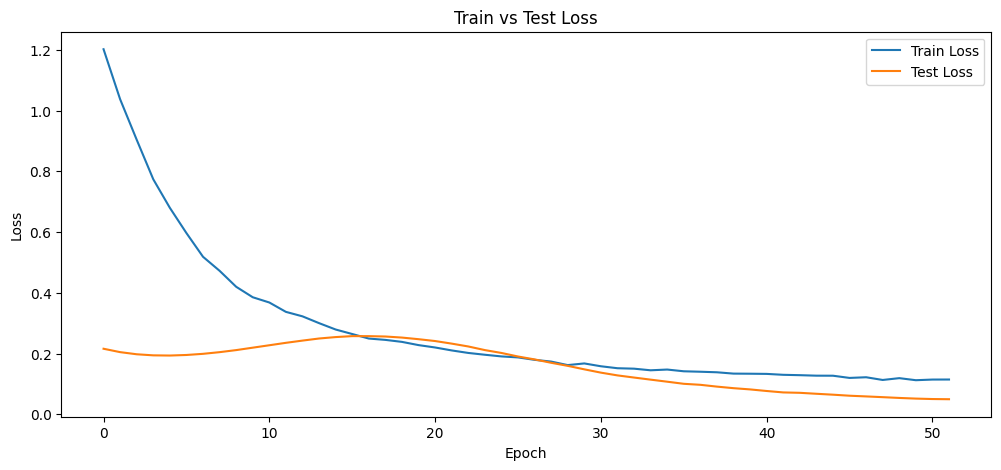

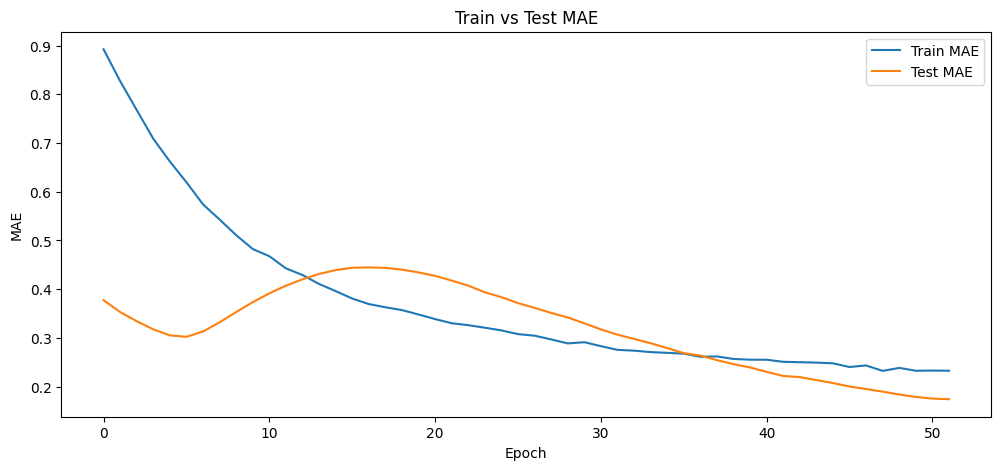

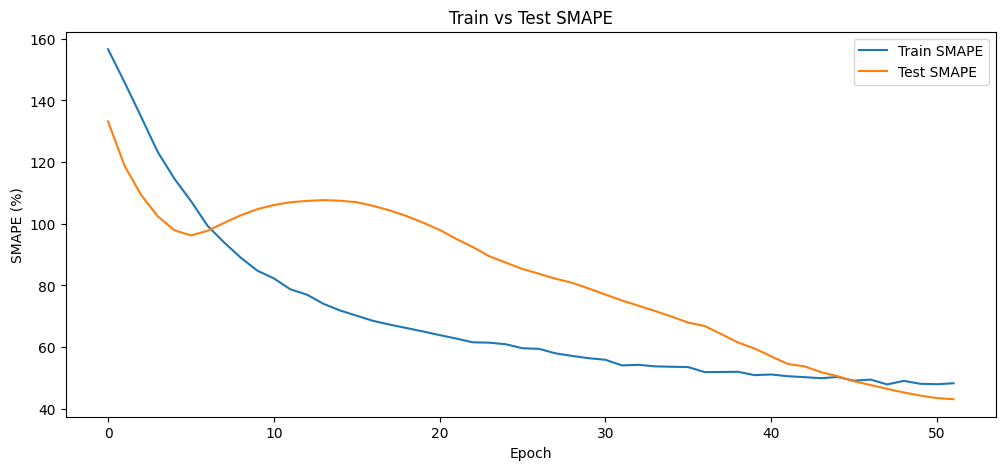

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


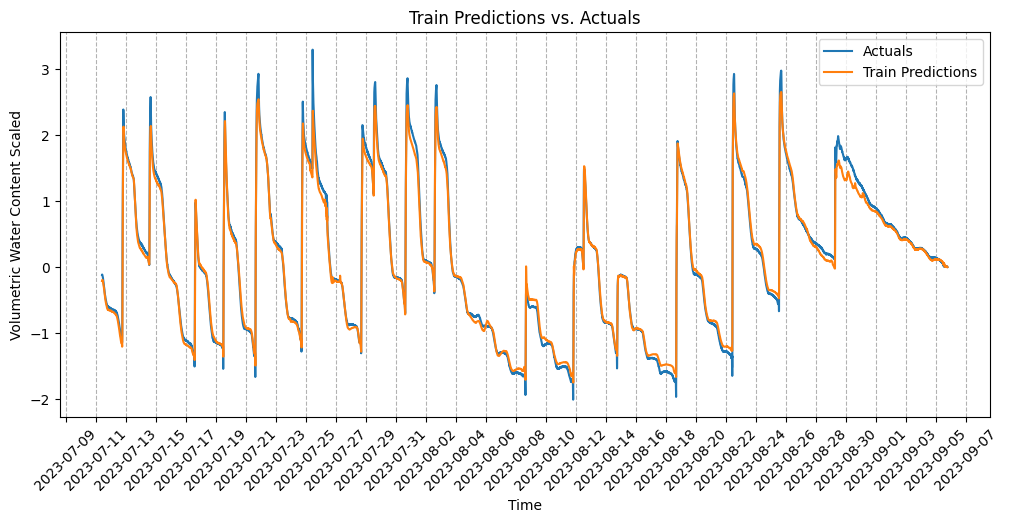

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


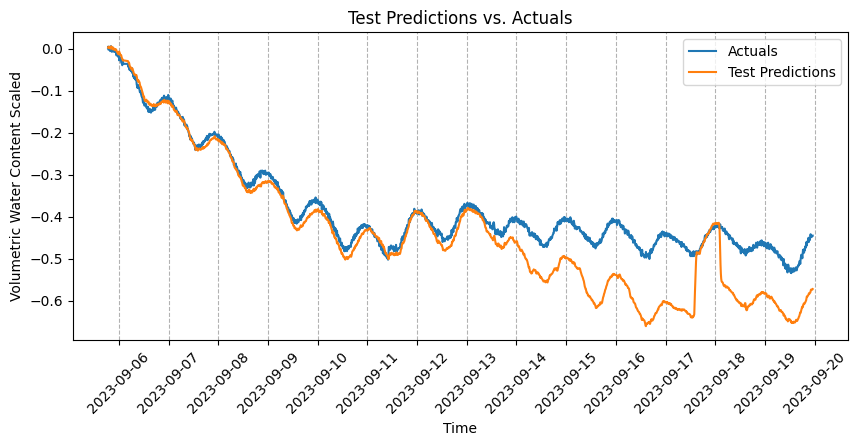

In [120]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import matplotlib.dates as mdates
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# SMAPE function
def smape(y_true, y_pred):
    epsilon = keras.backend.epsilon()
    numerator = abs(y_pred - y_true)
    denominator = (abs(y_true) + abs(y_pred)) / 2.0
    return tf.reduce_mean(numerator / (denominator + epsilon)) * 100

# Callback to calculate test metrics at the end of each epoch
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_mae = []
        self.test_smape = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        loss, mae, smape_value = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_loss.append(loss)
        self.test_mae.append(mae)
        self.test_smape.append(smape_value)
        print(f"\nEpoch {epoch+1} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test SMAPE: {smape_value:.4f}")


# Create model structure
lstmModel_3 = keras.Sequential(name="lstmModel_3")
lstmModel_3.add(keras.layers.LSTM(6, input_shape=(X_train.shape[1], X_train.shape[2]),kernel_regularizer=l2(0.001), name="LSTM_1")) 
lstmModel_3.add(keras.layers.Dropout(0.2))  # Dropout layer to prevent overfitting
lstmModel_3.add(keras.layers.Dense(1, activation='linear',kernel_regularizer=l2(0.001), name="Dense_1"))  # Output layer
lstmModel_3.compile(loss='MeanSquaredError', metrics=['MAE', smape], optimizer=Adam(learning_rate=0.0001))
lstmModel_3.summary()

# Instantiate the callback
test_metrics_callback = TestMetricsCallback(test_data=(X_test, y_test))

# Earlu Stopping Callback
early_stopping = EarlyStopping(monitor='MAE', patience=4, restore_best_weights=True, verbose=1)

# Convert data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Train model without validation_split
history = lstmModel_3.fit(X_train, y_train, epochs=60, shuffle=False, callbacks=[early_stopping, test_metrics_callback])

# Plot Train vs Test Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'], label='Train MAE')
plt.plot(test_metrics_callback.test_mae, label='Test MAE')
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test SMAPE
plt.figure(figsize=(12, 5))
plt.plot(history.history['smape'], label='Train SMAPE')
plt.plot(test_metrics_callback.test_smape, label='Test SMAPE')
plt.title('Train vs Test SMAPE')
plt.ylabel('SMAPE (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


#TRAIN DATA VISUALIZATION

train_predictions = lstmModel_1.predict(X_train).flatten()
y_train = y_train.flatten()

# Ensure df_copy contains the 'timestamp' column
timestamp_training = df_copy['timestamp'].iloc[:int(SPLIT * len(X_temp))]
train_results = pd.DataFrame(data={'timestamp':timestamp_training, 'Train Predictions':train_predictions, 'Actuals':y_train})

# Plot the test results
plt.figure(figsize=(12, 5))
plt.plot(train_results['timestamp'], train_results['Actuals'], label='Actuals')
plt.plot(train_results['timestamp'], train_results['Train Predictions'], label='Train Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval= 2))  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.title('Train Predictions vs. Actuals')
plt.legend(['Actuals', 'Train Predictions'])
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


# TEST DATA VISUALIZATION

# Evaluate the model on the test set
test_predicions = lstmModel_1.predict(X_test).flatten()
y_test = y_test.flatten()

timestamp_testing = df_copy['timestamp'].iloc[int(SPLIT * len(X_temp)):].reset_index(drop=True)
timestamp_testing = timestamp_testing[:-5] # Drop last 5 values to match the length of test_predictions

test_results = pd.DataFrame(data={'timestamp':timestamp_testing, 'Test Predictions':test_predicions, 'Actuals':y_test})

# Plot the test results
plt.figure(figsize=(10, 4))
plt.plot(test_results['timestamp'], test_results['Actuals'], label='Actuals')
plt.plot(test_results['timestamp'], test_results['Test Predictions'], label='Test Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.legend(['Actuals', 'Test Predictions'])
plt.title('Test Predictions vs. Actuals')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


## lstmModel_4 with EarlyStopping and ReduceOnPlateau
Most complex stacked model

Model: "lstmModel_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 5, 128)              │          71,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_2 (LSTM)                        │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,049 (523.63 KB)

 Trainable params: 134,049 (523.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
251/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.1137 - loss: 0.0331 - smape: 33.4755
Epoch 1 - Test Loss: 0.0446, Test MAE: 0.1560, Test SMAPE: 54.6347
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - MAE: 0.1137 - loss: 0.0331 - smape: 33.4502 - learning_rate: 0.0010
Epoch 2/100
252/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.1914 - loss: 0.0756 - smape: 42.1795
Epoch 2 - Test Loss: 0.0115, Test MAE: 0.0599, Test SMAPE: 20.3741
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.1911 - loss: 0.0754 - smape: 42.1084 - learning_rate: 0.0010
Epoch 3/100
244/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.1275 - loss: 0.0398 - smape: 33.8704
Epoch 3 - Test Loss: 0.0175, Test MAE: 0.0945, Test SMAPE: 25.2854
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.1274 - loss: 0.0398 - smape: 33.7136 - learning_rate: 0.0010
Epoch 4/100
253/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.1283 - loss: 0.0402 - smape: 34.4802
Epoch 4 - Test Loss: 0.0197, Test MAE: 0.1036, Test SMAPE: 26.9748
254

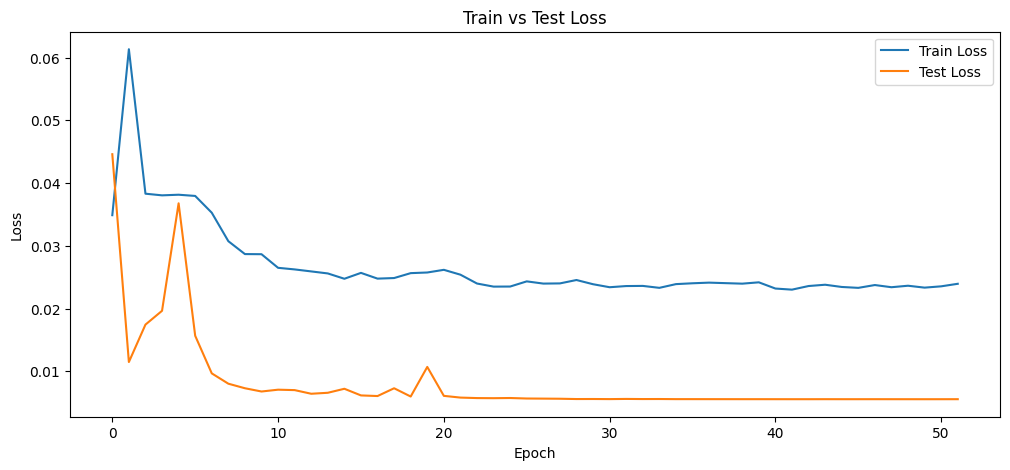

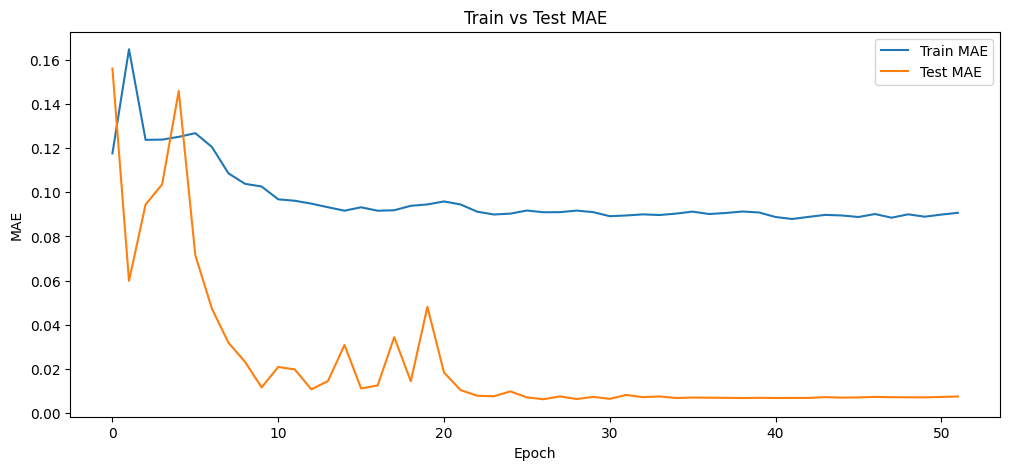

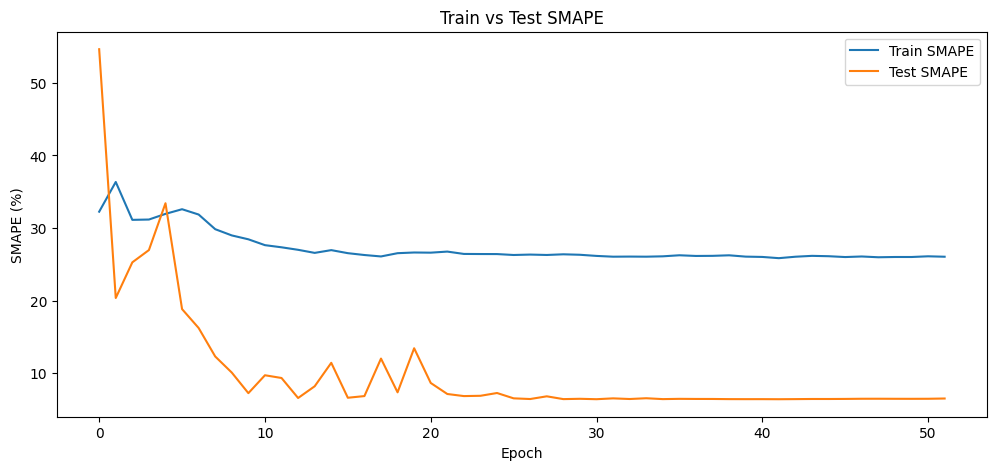

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


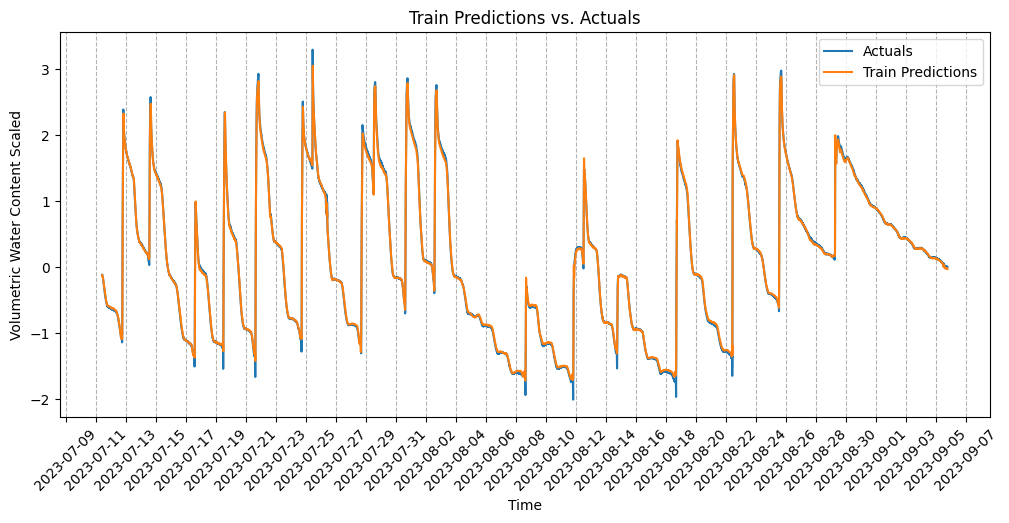

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


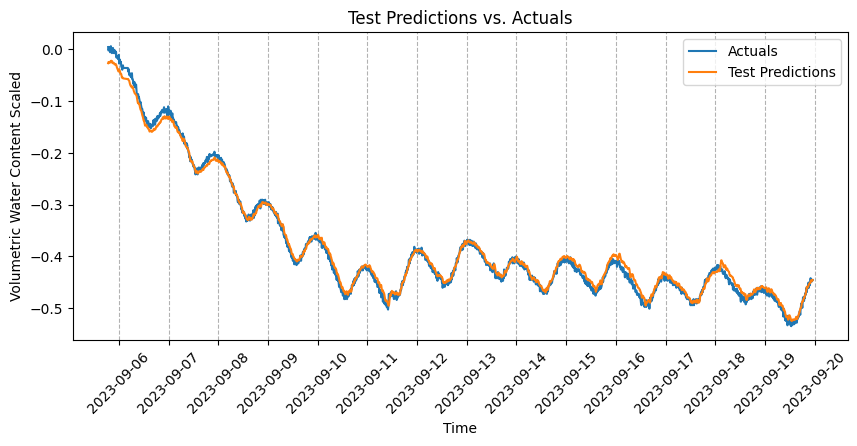

In [83]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# SMAPE function
def smape(y_true, y_pred):
    epsilon = keras.backend.epsilon()
    numerator = abs(y_pred - y_true)
    denominator = (abs(y_true) + abs(y_pred)) / 2.0
    return tf.reduce_mean(numerator / (denominator + epsilon)) * 100

# Callback to calculate test metrics at the end of each epoch
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_mae = []
        self.test_smape = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        loss, mae, smape_value = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_loss.append(loss)
        self.test_mae.append(mae)
        self.test_smape.append(smape_value)
        print(f"\nEpoch {epoch+1} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test SMAPE: {smape_value:.4f}")


# Create model structure
lstmModel_4 = keras.Sequential(name="lstmModel_4")

lstmModel_4.add(keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1], X_train.shape[2]), name="LSTM_1"))
lstmModel_4.add(keras.layers.Dropout(0.3)) 

lstmModel_4.add(keras.layers.LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001), name="LSTM_2"))
lstmModel_4.add(keras.layers.Dropout(0.3))

lstmModel_4.add(keras.layers.LSTM(32, return_sequences=False, kernel_regularizer=l2(0.001), name="LSTM_3"))
lstmModel_4.add(keras.layers.Dropout(0.3))

lstmModel_4.add(keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.001), name="Dense_1"))
lstmModel_4.add(keras.layers.Dropout(0.2))

lstmModel_4.add(keras.layers.Dense(1, activation='linear', name="Output"))

lstmModel_2.compile(loss='MeanSquaredError', metrics=['MAE', smape], optimizer=Adam(learning_rate=0.001))
lstmModel_4.summary()



# Instantiate the callback
test_metrics_callback = TestMetricsCallback(test_data=(X_test, y_test))


# Callbacks
early_stopping = EarlyStopping(monitor='MAE', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='MAE', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Convert data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Train model without validation_split
history = lstmModel_2.fit(X_train, y_train, epochs=100, shuffle=False, callbacks=[early_stopping, reduce_lr, test_metrics_callback])

# Plot Train vs Test Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'], label='Train MAE')
plt.plot(test_metrics_callback.test_mae, label='Test MAE')
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test SMAPE
plt.figure(figsize=(12, 5))
plt.plot(history.history['smape'], label='Train SMAPE')
plt.plot(test_metrics_callback.test_smape, label='Test SMAPE')
plt.title('Train vs Test SMAPE')
plt.ylabel('SMAPE (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


#TRAIN DATA VISUALIZATION

train_predictions = lstmModel_2.predict(X_train).flatten()
y_train = y_train.flatten()

# Ensure df_copy contains the 'timestamp' column
timestamp_training = df_copy['timestamp'].iloc[:int(SPLIT * len(X_temp))]
train_results = pd.DataFrame(data={'timestamp':timestamp_training, 'Train Predictions':train_predictions, 'Actuals':y_train})

# Plot the test results
plt.figure(figsize=(12, 5))
plt.plot(train_results['timestamp'], train_results['Actuals'], label='Actuals')
plt.plot(train_results['timestamp'], train_results['Train Predictions'], label='Train Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval= 2))  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.title('Train Predictions vs. Actuals')
plt.legend(['Actuals', 'Train Predictions'])
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


# TEST DATA VISUALIZATION

# Evaluate the model on the test set
test_predicions = lstmModel_2.predict(X_test).flatten()
y_test = y_test.flatten()

timestamp_testing = df_copy['timestamp'].iloc[int(SPLIT * len(X_temp)):].reset_index(drop=True)
timestamp_testing = timestamp_testing[:-5] # Drop last 5 values to match the length of test_predictions

test_results = pd.DataFrame(data={'timestamp':timestamp_testing, 'Test Predictions':test_predicions, 'Actuals':y_test})

# Plot the test results
plt.figure(figsize=(10, 4))
plt.plot(test_results['timestamp'], test_results['Actuals'], label='Actuals')
plt.plot(test_results['timestamp'], test_results['Test Predictions'], label='Test Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.legend(['Actuals', 'Test Predictions'])
plt.title('Test Predictions vs. Actuals')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()

<h1> Building GRU Models <h1>

## gruModel_1

Model: "gruModel_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ GRU_1 (GRU)                          │ (None, 5, 50)               │           9,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ GRU_2 (GRU)                          │ (None, 25)                  │           5,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_85 (Dropout)                 │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,251 (59.57 KB)

 Trainable params: 15,251 (59.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
250/254 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 0.4129 - loss: 0.3522 - smape: 75.1476
Epoch 1 - Test Loss: 0.1743, Test MAE: 0.2900, Test SMAPE: 69.4131
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - MAE: 0.4120 - loss: 0.3512 - smape: 75.0059
Epoch 2/60
253/254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MAE: 0.2262 - loss: 0.1517 - smape: 48.0152
Epoch 2 - Test Loss: 0.1478, Test MAE: 0.2836, Test SMAPE: 58.6345
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - MAE: 0.2261 - loss: 0.1516 - smape: 48.0208
Epoch 3/60
248/254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MAE: 0.1939 - loss: 0.1208 - smape: 46.7221
Epoch 3 - Test Loss: 0.1283, Test MAE: 0.2676, Test SMAPE: 56.6917
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - MAE: 0.1933 - loss: 0.1204 - smape: 46.6049
Epoch 4/60
252/254 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - MAE: 0.1809 - loss: 0.1073 - smape: 45.0210
Epoch 4 - Test Loss: 0.0896, Test MAE: 0.2052, Test SMAPE: 47.4898
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - MAE: 0.1806 - loss: 0.1071 - smape:

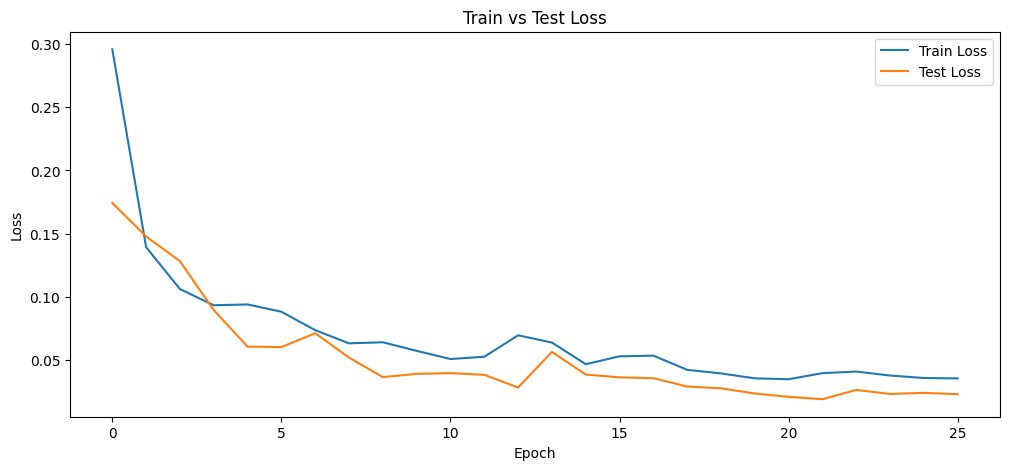

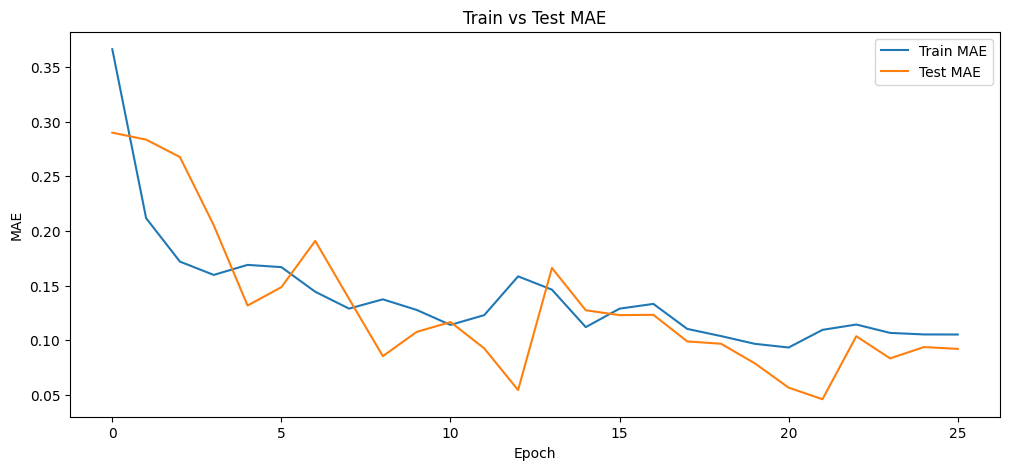

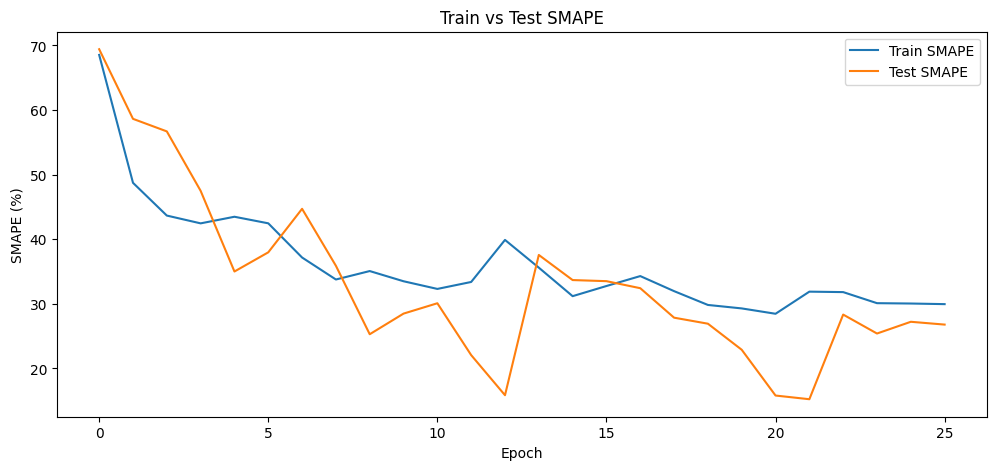

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


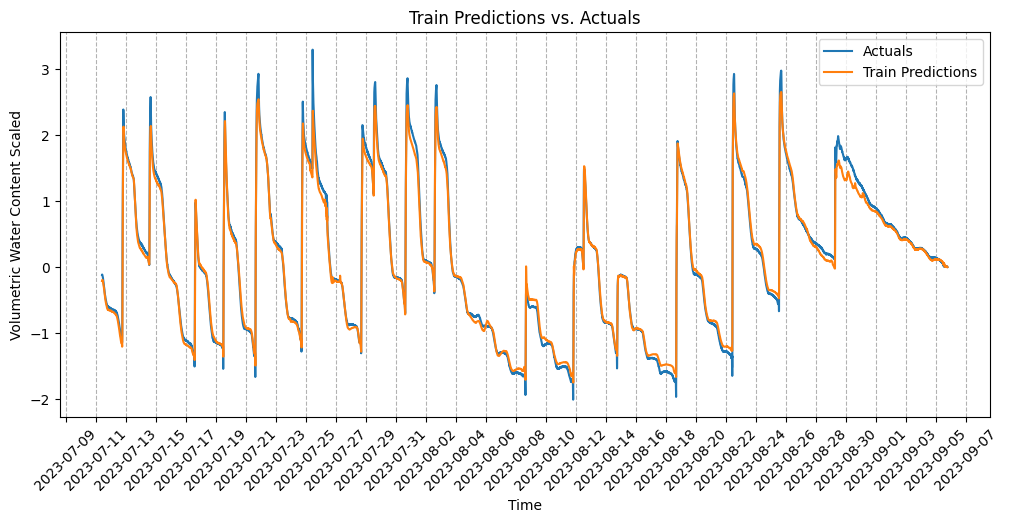

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


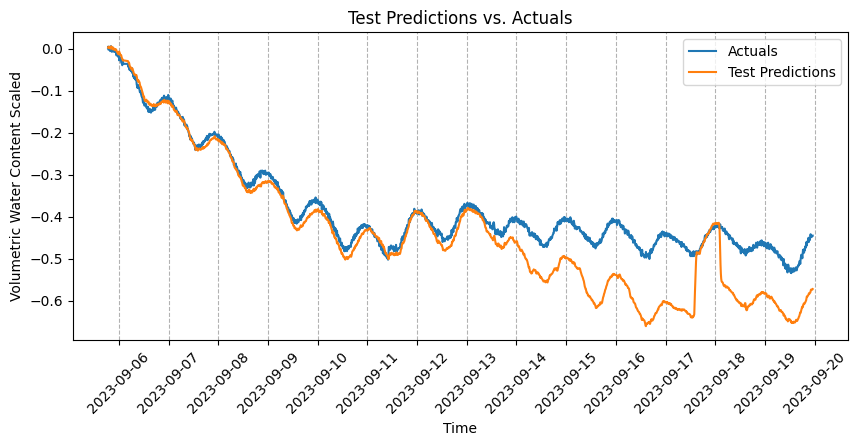

In [117]:
##### import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import matplotlib.dates as mdates
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# SMAPE function
def smape(y_true, y_pred):
    epsilon = keras.backend.epsilon()
    numerator = abs(y_pred - y_true)
    denominator = (abs(y_true) + abs(y_pred)) / 2.0
    return tf.reduce_mean(numerator / (denominator + epsilon)) * 100

# Callback to calculate test metrics at the end of each epoch
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_mae = []
        self.test_smape = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        loss, mae, smape_value = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_loss.append(loss)
        self.test_mae.append(mae)
        self.test_smape.append(smape_value)
        print(f"\nEpoch {epoch+1} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test SMAPE: {smape_value:.4f}")


# Create model structure
lstmModel_3 = keras.Sequential(name="gruModel_1")
lstmModel_3.add(keras.layers.GRU(50,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),kernel_regularizer=l2(0.001), name="GRU_1")) 
lstmModel_3.add(keras.layers.GRU(25, kernel_regularizer=l2(0.001), name="GRU_2")) 
lstmModel_3.add(keras.layers.Dropout(0.2))  # Dropout layer to prevent overfitting
lstmModel_3.add(keras.layers.Dense(1, activation='linear',kernel_regularizer=l2(0.001), name="Dense_1"))  # Output layer
lstmModel_3.compile(loss='MeanSquaredError', metrics=['MAE', smape], optimizer=Adam(learning_rate=0.0005))
lstmModel_3.summary()

# Instantiate the callback
test_metrics_callback = TestMetricsCallback(test_data=(X_test, y_test))

# Earlu Stopping Callback
early_stopping = EarlyStopping(monitor='MAE', patience=5, restore_best_weights=True, verbose=1)

# Convert data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Train model without validation_split
history = lstmModel_3.fit(X_train, y_train, epochs=60, shuffle=False, callbacks=[early_stopping, test_metrics_callback])

# Plot Train vs Test Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'], label='Train MAE')
plt.plot(test_metrics_callback.test_mae, label='Test MAE')
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test SMAPE
plt.figure(figsize=(12, 5))
plt.plot(history.history['smape'], label='Train SMAPE')
plt.plot(test_metrics_callback.test_smape, label='Test SMAPE')
plt.title('Train vs Test SMAPE')
plt.ylabel('SMAPE (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


#TRAIN DATA VISUALIZATION

train_predictions = lstmModel_1.predict(X_train).flatten()
y_train = y_train.flatten()

# Ensure df_copy contains the 'timestamp' column
timestamp_training = df_copy['timestamp'].iloc[:int(SPLIT * len(X_temp))]
train_results = pd.DataFrame(data={'timestamp':timestamp_training, 'Train Predictions':train_predictions, 'Actuals':y_train})

# Plot the test results
plt.figure(figsize=(12, 5))
plt.plot(train_results['timestamp'], train_results['Actuals'], label='Actuals')
plt.plot(train_results['timestamp'], train_results['Train Predictions'], label='Train Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval= 2))  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.title('Train Predictions vs. Actuals')
plt.legend(['Actuals', 'Train Predictions'])
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


# TEST DATA VISUALIZATION

# Evaluate the model on the test set
test_predicions = lstmModel_1.predict(X_test).flatten()
y_test = y_test.flatten()

timestamp_testing = df_copy['timestamp'].iloc[int(SPLIT * len(X_temp)):].reset_index(drop=True)
timestamp_testing = timestamp_testing[:-5] # Drop last 5 values to match the length of test_predictions

test_results = pd.DataFrame(data={'timestamp':timestamp_testing, 'Test Predictions':test_predicions, 'Actuals':y_test})

# Plot the test results
plt.figure(figsize=(10, 4))
plt.plot(test_results['timestamp'], test_results['Actuals'], label='Actuals')
plt.plot(test_results['timestamp'], test_results['Test Predictions'], label='Test Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.legend(['Actuals', 'Test Predictions'])
plt.title('Test Predictions vs. Actuals')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()
